In [1]:
import os
import shutil
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import psutil
import sys
import pyemu
import swatp_pst
assert "dependencies" in pyemu.__file__
assert "dependencies" in swatp_pst.__file__

In [3]:
from swatp_pst import analyzer

In [4]:
m_d = '/Users/seonggyu.park/Documents/projects/tools/swatp_pst_wf/models/albufera/2nd/alb_rw_ies'

In [5]:
pst_file = "alb_rw_ies.pst"
pst = pyemu.Pst(os.path.join(m_d, pst_file))

In [8]:
# load prior simulation
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"alb_rw_ies.0.obs.csv")
    )
# load posterior simulation
pt_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,
    filename=os.path.join(m_d,"alb_rw_ies.{0}.obs.csv".format(11))
    )

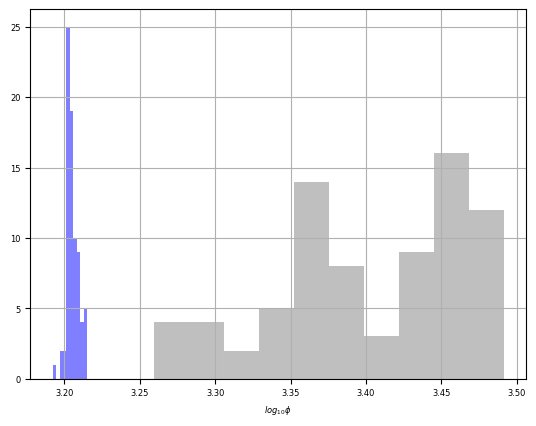

In [10]:
# plot progress
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=False)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=False)
_ = ax.set_xlabel("$log_{10}\\phi$")

/Users/seonggyu.park/Documents/projects/tools/swatp_pst_wf/notebooks/02_workflows


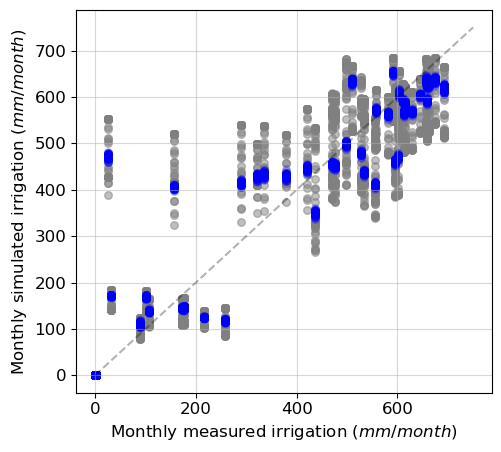

In [17]:
analyzer.plot_onetone_ensembles(pst, pr_oe, pt_oe, dot=True)